## Entregas 

### análise exploratória dos dados (EDA)

In [4]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pickle

In [5]:
#configurando estilos
plt.style.use('ggplot') 
sns.set_palette("viridis")
pd.set_option('display.float_format', '{:.2f}'.format) # Formata números para exibição

In [6]:
#Carregando os dados
df = pd.read_csv("desafio_indicium_imdb.csv", index_col=0) #Retirando a coluna Unnamed

In [7]:
#Visão Geral dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [8]:
#cabeçalho 
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [9]:
#Estatistica descritiva 
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.00,842.00,999.00
mean,7.95,77.97,271621.42
std,0.27,12.38,320912.62
min,7.60,28.00,25088.00
25%,7.70,70.00,55471.50
50%,7.90,79.00,138356.00
75%,8.10,87.00,373167.50
max,9.20,100.00,2303232.00


In [10]:
# Estatísticas descritivas das colunas categóricas
print("═" * 50)
print("ESTATÍSTICAS DESCRITIVAS - COLUNAS CATEGÓRICAS:")
print("═" * 50)
categorical_cols = df.select_dtypes(include=['object']).columns
display(df[categorical_cols].describe())

══════════════════════════════════════════════════
ESTATÍSTICAS DESCRITIVAS - COLUNAS CATEGÓRICAS:
══════════════════════════════════════════════════


,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
count,999,999,898,999,999,999,999,999,999,999,999,830
unique,998,100,16,140,202,999,548,659,840,890,938,822
top,Drishyam,2014,U,100 min,Drama,An organized crime dynasty's aging patriarch t...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"4,360,000"
freq,2,32,234,23,84,1,14,12,7,5,4,5


In [11]:
# Verificar valores ausentes
print(df.isnull().sum())

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [12]:
#Remover os valores nulos
df = df.dropna()

In [13]:
#dados pós tratamento de dados nulos
print(df.isnull().sum())

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [14]:
#Dados duplicados
print("Duplicados: ", df.duplicated().sum())

Duplicados:  0


In [15]:
# Remove vírgulas, aspas e converte para float 
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('"', '').astype(float)

In [16]:
#Lidando com a coluna Runtime
df['Runtime_min'] = df['Runtime'].str.extract('(\d+)').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\luisn\AppData\Local\Temp\ipykernel_7412\3909935614.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Runtime_min'] = df['Runtime'].str.extract('(\d+)').astype(float)


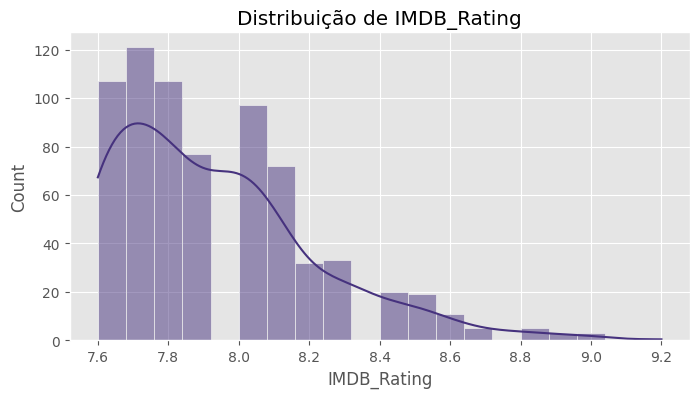

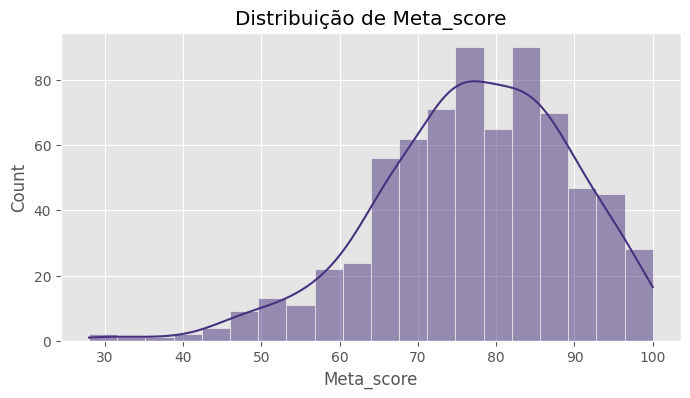

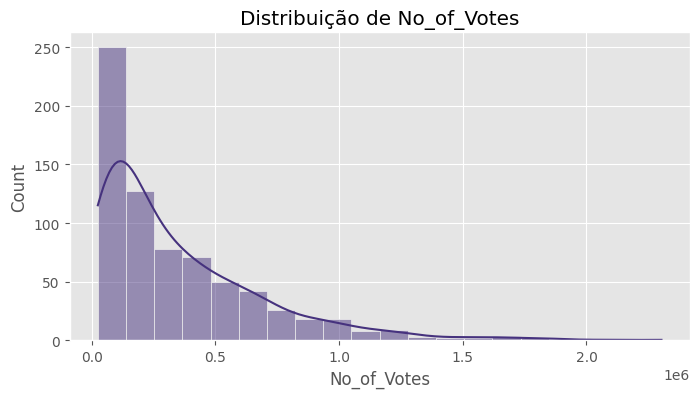

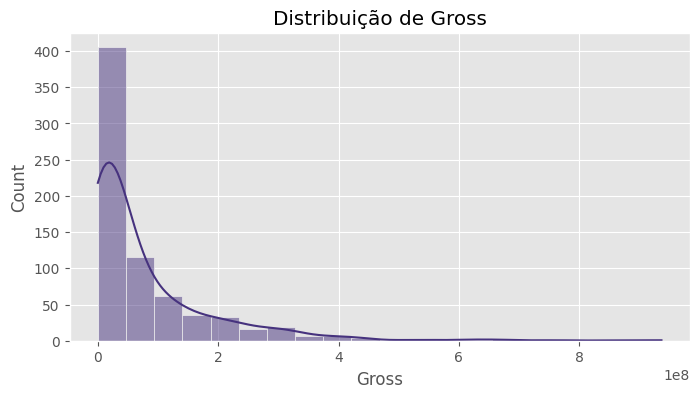

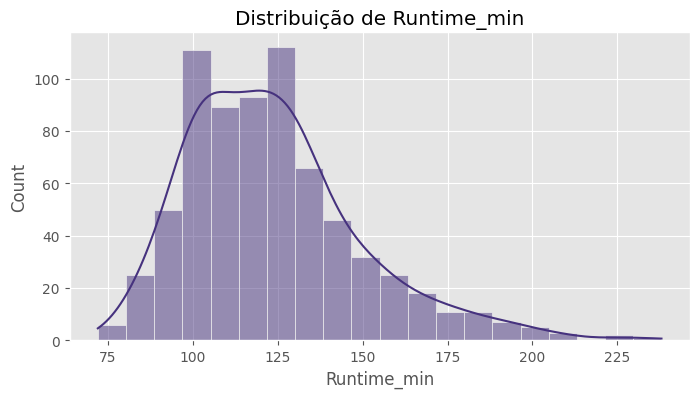

In [17]:
#Distribuição das variáveis numéricas

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribuição de {col}")
    plt.show()

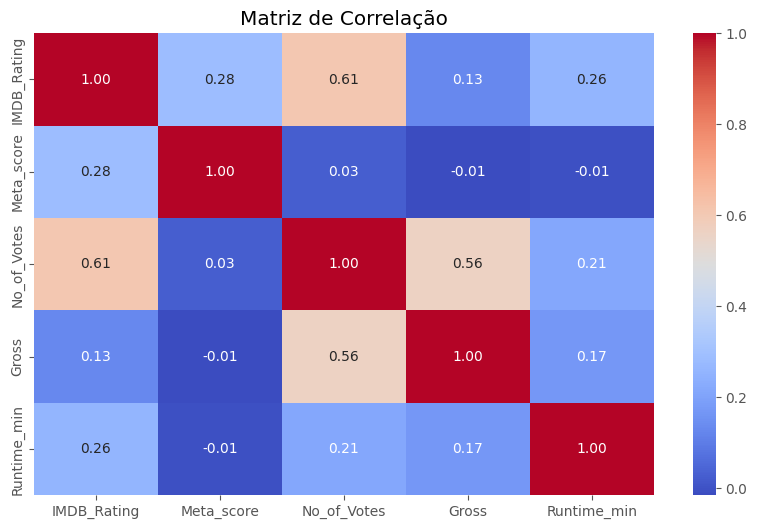

In [18]:
# Correlação entre variáveis numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [19]:
# Converte para numérico
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Agrupa em décadas de 20 anos
df['20_Years_Block'] = (df['Released_Year'] // 20) * 20

# Para ficar mais legível
df['20_Years_Block'] = (df['Released_Year'] // 20) * 20

C:\Users\luisn\AppData\Local\Temp\ipykernel_7412\2128100379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='20_Years_Block', y='IMDB_Rating', data=df, palette="Set3")


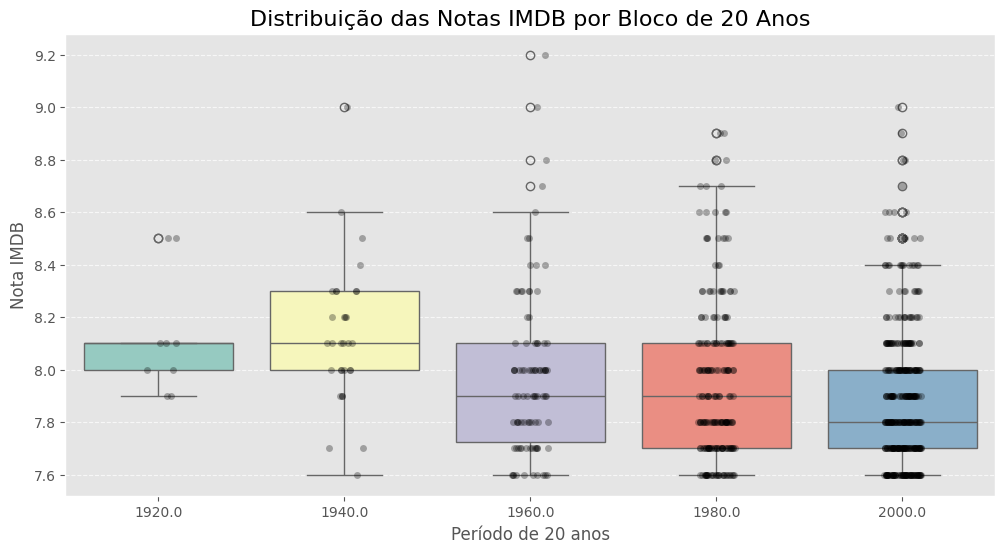

In [20]:
#Distribuição em boxplot das notas IMDB por blocos de  20 anos
plt.figure(figsize=(12,6))
sns.boxplot(x='20_Years_Block', y='IMDB_Rating', data=df, palette="Set3")
sns.stripplot(x='20_Years_Block', y='IMDB_Rating', data=df, color='black', alpha=0.3, jitter=True)

plt.title('Distribuição das Notas IMDB por Bloco de 20 Anos', fontsize=16)
plt.xlabel('Período de 20 anos', fontsize=12)
plt.ylabel('Nota IMDB', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: >

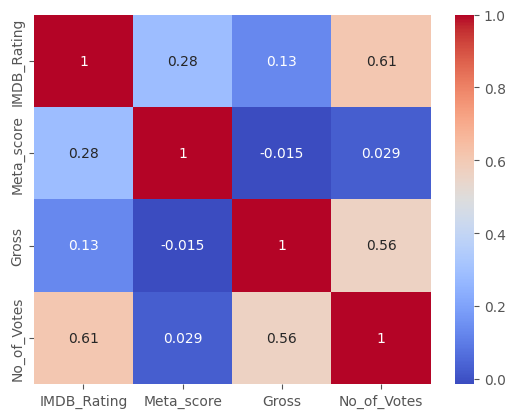

In [21]:
# Correlação entre nota IMDB e metascore
correlation = df[['IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

### Qual filme você recomendaria para uma pessoa que você não conhece?


In [22]:
# Filmes com boa nota e bom número de votos
recommendation = df[df['IMDB_Rating'] >= 8.0].sort_values(by='Gross', ascending=False).head(1)
recommendation[['Series_Title', 'IMDB_Rating', 'Gross', 'Genre']]


,Series_Title,IMDB_Rating,Gross,Genre
59,Avengers: Endgame,8.40,858373000.00,"Action, Adventure, Drama"


### Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 


In [23]:
# Converter todos os valores para string (tratando NaN)
df['Gross'] = df['Gross'].astype(str)

# Substituir vírgulas e converter para float
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df[['Series_Title', 'Gross', 'IMDB_Rating']].sort_values(by='Gross', ascending=False).head(5)

,Series_Title,Gross,IMDB_Rating
477,Star Wars: Episode VII - The Force Awakens,936662225.00,7.90
59,Avengers: Endgame,858373000.00,8.40
623,Avatar,760507625.00,7.80
60,Avengers: Infinity War,678815482.00,8.40
652,Titanic,659325379.00,7.80


### Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?


In [24]:
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X = tfidf.fit_transform(df["Overview"].fillna(""))

In [25]:
df["Main_Genre"] = df["Genre"].str.split(",").str[0]
y = df["Main_Genre"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Action       0.40      0.21      0.28        28
   Adventure       0.00      0.00      0.00        12
   Animation       0.00      0.00      0.00         8
   Biography       1.00      0.20      0.33        10
      Comedy       1.00      0.06      0.11        17
       Crime       0.00      0.00      0.00        16
       Drama       0.37      0.94      0.53        49
      Horror       0.00      0.00      0.00         3

    accuracy                           0.38       143
   macro avg       0.35      0.18      0.16       143
weighted avg       0.39      0.38      0.27       143



c:\Users\luisn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\luisn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\luisn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

### Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


Para prever a nota do IMDB, os dados foram preparados convertendo variáveis textuais e financeiras em valores numéricos e preenchendo valores ausentes com a mediana. Variáveis categóricas como gênero e classificação foram transformadas em dummies (one-hot encoding).

As features usadas foram: Runtime_min, Released_Year, Meta_score, No_of_Votes, Gross e as dummies, representando aspectos técnicos, críticos e comerciais dos filmes.

O problema é de regressão, e o modelo escolhido foi o Random Forest Regressor, por lidar bem com dados heterogêneos, capturar relações não lineares e ser robusto a outliers. Vantagens: boa performance e baixo pré-processamento; desvantagens: custo computacional e menor interpretabilidade.

Para avaliação, foram usadas as métricas R² (proporção da variância explicada) e MAE (erro médio absoluto em pontos de IMDB).

Por fim, analisou-se a importância das variáveis, identificando quais fatores mais influenciam a nota dos filmes.

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\luisn\AppData\Local\Temp\ipykernel_7412\1768600254.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_model['Runtime_min'] = df_model['Runtime'].str.extract('(\d+)').astype(float)


R²: 0.565
MAE: 0.153 pontos IMDB


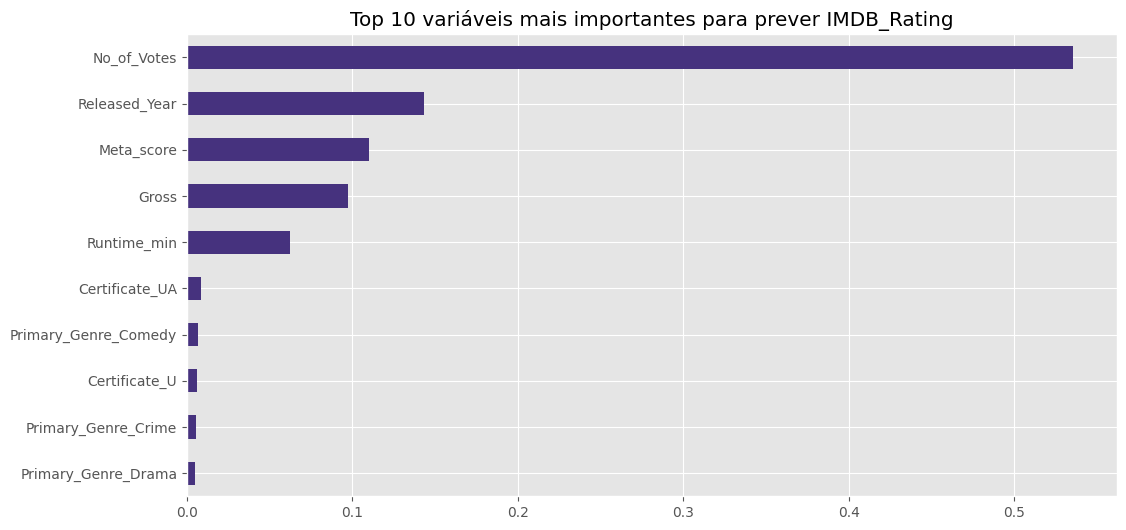

In [27]:
# ---  Limpeza e transformação das colunas ---
df_model = df.copy()

# Converter Runtime para minutos
df_model['Runtime_min'] = df_model['Runtime'].str.extract('(\d+)').astype(float)

# Converter Released_Year para numérico
df_model['Released_Year'] = pd.to_numeric(df_model['Released_Year'], errors='coerce')

# Limpar Gross e converter para float
df_model['Gross'] = df_model['Gross'].astype(str).str.replace(',', '', regex=False)
df_model['Gross'] = pd.to_numeric(df_model['Gross'], errors='coerce')

# Preencher NaN em Meta_score e Gross com mediana
df_model['Meta_score'] = df_model['Meta_score'].fillna(df_model['Meta_score'].median())
df_model['Gross'] = df_model['Gross'].fillna(df_model['Gross'].median())

# ---  Seleção de features ---
# Converter Genre e Certificate em one-hot
df_model['Primary_Genre'] = df_model['Genre'].str.split(',').str[0]
df_model = pd.get_dummies(df_model, columns=['Primary_Genre', 'Certificate'], drop_first=True)

# Features numéricas
feature_cols = ['Runtime_min', 'Released_Year', 'Meta_score', 'No_of_Votes', 'Gross'] + \
               [col for col in df_model.columns if col.startswith('Primary_Genre_') or col.startswith('Certificate_')]

X = df_model[feature_cols]
y = df_model['IMDB_Rating']

# ---  Divisão treino/teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---  Treinar modelo ---
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# ---  Avaliação ---
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f} pontos IMDB")

# ---  Importância das variáveis ---

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
importances.head(10).plot(kind='barh')
plt.title("Top 10 variáveis mais importantes para prever IMDB_Rating")
plt.gca().invert_yaxis()
plt.show()

### Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


Qual seria a nota do IMDB?


In [28]:
# Dicionário do filme
new_movie = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}


In [29]:
df_new = pd.DataFrame([new_movie])

In [30]:
# Pré-processamento do novo filme
for col in ['Runtime', 'Gross']:
    df_new[col] = df_new[col].astype(str)


df_new['Runtime_min'] = df_new['Runtime'].str.extract(r'(\d+)').astype(float)
df_new['Released_Year'] = pd.to_numeric(df_new['Released_Year'], errors='coerce')
df_new['Gross'] = df_new['Gross'].str.replace(',', '', regex=False).astype(float)

In [31]:
df_new['Primary_Genre'] = df_new['Genre'].str.split(',').str[0]

In [32]:
# One-hot encoding para as colunas do modelo
for col in X.columns:
    if col.startswith('Primary_Genre_'):
        genre = col.replace('Primary_Genre_', '')
        df_new[col] = 1 if df_new['Primary_Genre'].iloc[0] == genre else 0
    elif col.startswith('Certificate_'):
        cert = col.replace('Certificate_', '')
        df_new[col] = 1 if df_new['Certificate'].iloc[0] == cert else 0

In [33]:
# Preencher colunas faltantes com zero
for col in X.columns:
    if col not in df_new.columns:
        df_new[col] = 0

In [34]:
df_new = df_new[X.columns]


In [35]:
predicted_rating = model.predict(df_new)[0]
print(f"Nota prevista do IMDB para '{new_movie['Series_Title']}': {predicted_rating:.2f}")

Nota prevista do IMDB para 'The Shawshank Redemption': 8.82


### Salve o modelo desenvolvido no formato .pkl. 


In [37]:
# Salvar o DataFrame processado 
with open('dados_processados.pkl', 'wb') as file:
    pickle.dump(df, file)